<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/Atividade/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de regressão**

**Previsão de insuficiência cardíaca**

*   Data set com informações clínicas que podem permitir a criação de um modelo capaz de prever a mortalidade por insuficiência cardíaca.
*   [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
*   12 características clínicas que podem prognosticar eventos de morte.
*   299 instâncias.

In [105]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**1. Importando bibliotecas**

In [106]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

**2. Lendo dados**

In [107]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Semana 4/heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**3. Organização dos dados**

In [108]:
data.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**4. Análise Preliminar dos Dados**

***Legenda***

* **Sex (Sexo)** -  Feminino = 0, Masculino = 1
* **Age (Idade)** - Idade do paciente
* **Diabetes** - 0 = Não, 1 = Sim
* **Anaemia (Anemia)** - 0 = Não, 1 = Sim
* **High_blood_pressure (Pressão alta)** - 0 = Não, 1 = Sim
* **Smoking (Fumante)** - 0 = Não, 1 = Sim
* **DEATH_EVENT (Evento de Morte)** - 0 = Não, 1 = Sim
* **Creatinine_phosphokinase (Creatinina fosfoquinase)**
* **Ejection_fraction (Fração de ejeção)**
* **Platelets (Plaquetas)**	
* **Serum_creatinine (Creatinina sérica)**
*	**Serum_sodium (Sódio sérico)**	
* **Time (Tempo de acompanhamento)**

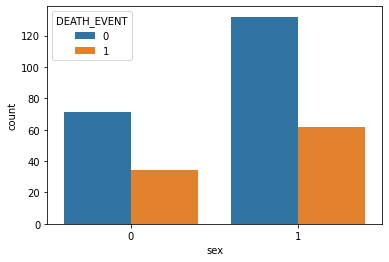

In [109]:
sns.countplot(x='sex',data=data,hue='DEATH_EVENT')

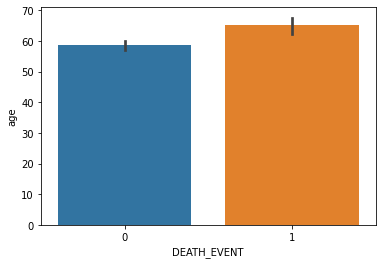

In [110]:
sns.barplot(x='DEATH_EVENT',y='age',data=data)

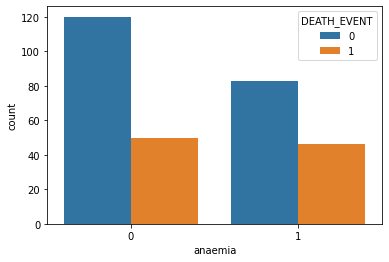

In [111]:
sns.countplot(x='anaemia',data=data,hue='DEATH_EVENT')

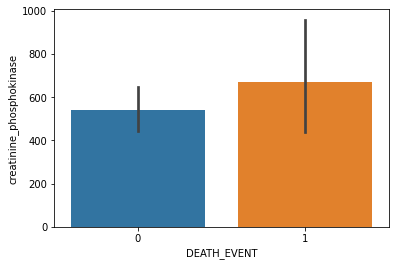

In [112]:
sns.barplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=data)

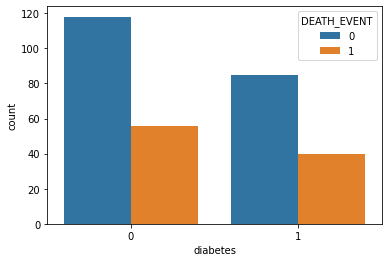

In [113]:
sns.countplot(x='diabetes',data=data,hue='DEATH_EVENT')

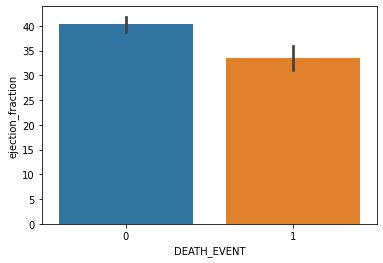

In [114]:
sns.barplot(x='DEATH_EVENT',y='ejection_fraction',data=data)

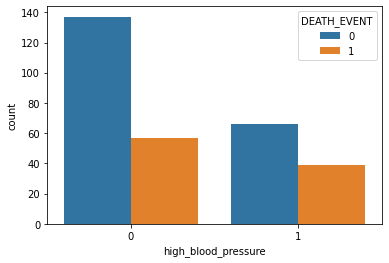

In [115]:
sns.countplot(x='high_blood_pressure',data=data,hue='DEATH_EVENT')

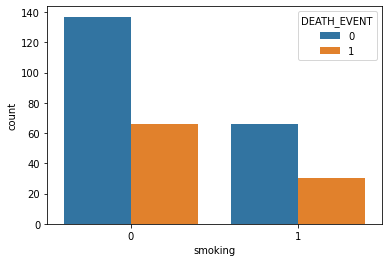

In [116]:
sns.countplot(x='smoking',data=data,hue='DEATH_EVENT')

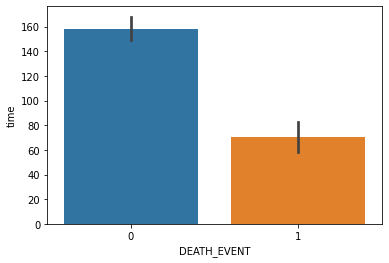

In [117]:
sns.barplot(x='DEATH_EVENT',y='time',data=data)

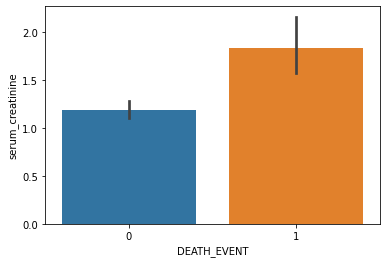

In [118]:
sns.barplot(x='DEATH_EVENT',y='serum_creatinine',data=data)

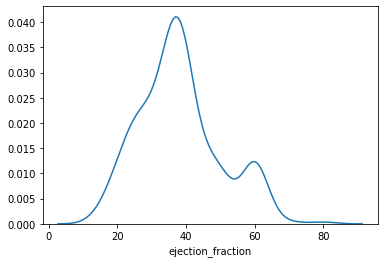

In [119]:
sns.distplot(data['ejection_fraction'], hist=False, rug=False)

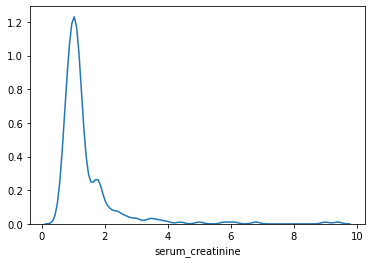

In [120]:
sns.distplot(data['serum_creatinine'], hist=False, rug=False)

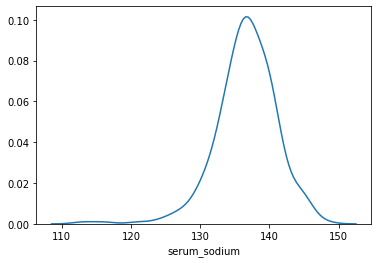

In [121]:
sns.distplot(data['serum_sodium'], hist=False, rug=False)

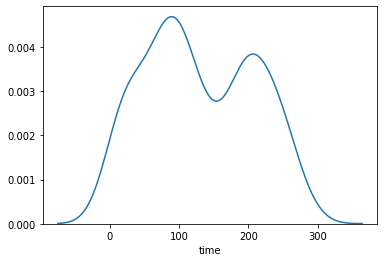

In [122]:
sns.distplot(data['time'], hist=False, rug=False)

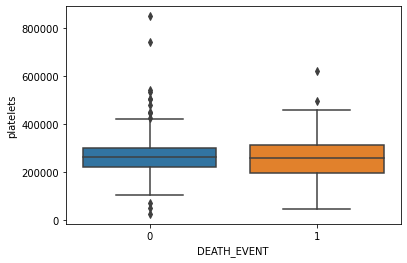

In [123]:
sns.boxplot(x='DEATH_EVENT',y='platelets',data=data)

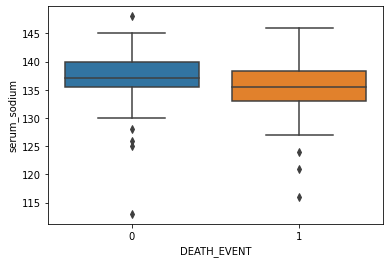

In [124]:
sns.boxplot(x='DEATH_EVENT',y='serum_sodium',data=data)

In [125]:
corr = data.corr()

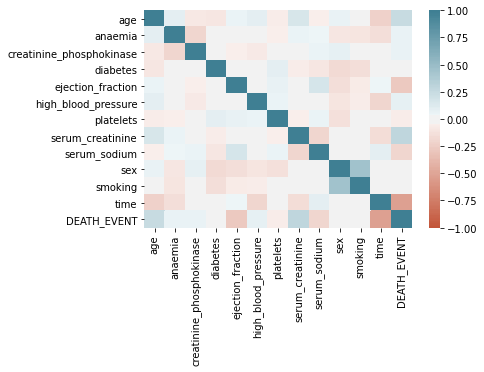

In [126]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

**5. Re-escala dos dados**

In [127]:
data = (data - data.min())/(data.max() - data.min())
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


**6. Organizando dados para modelagem**

In [128]:
X = data.drop(columns=['DEATH_EVENT'])
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [129]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**7. Treinando os modelos e fazendo previsão**

In [132]:
linear = LinearRegression()
linear.fit(X_train, y_train)
pred_linear = linear.predict(X_test)

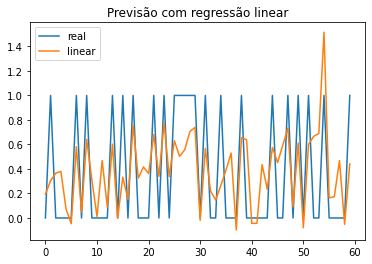

In [133]:
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [134]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

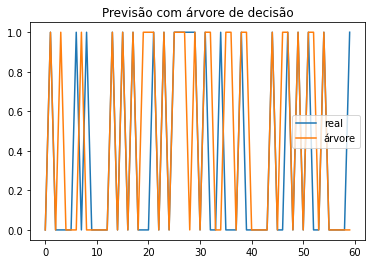

In [135]:
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_tree,label='árvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [136]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)

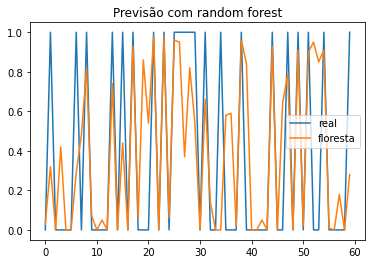

In [137]:
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_forest,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [138]:
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic')
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


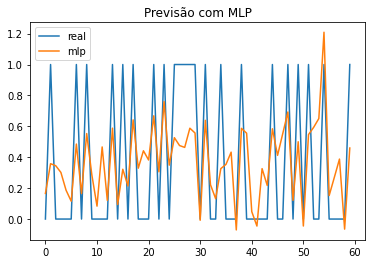

In [139]:
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

**8. Avaliando Modelos**

**Mean Absolute Error (MAE)**

In [140]:
from sklearn.metrics import mean_absolute_error

In [141]:
mean_absolute_error(y_test,pred_linear)

0.3233825719999131

In [142]:
mean_absolute_error(y_test,pred_tree)

0.25

In [143]:
mean_absolute_error(y_test, pred_forest)

0.23266666666666666

In [144]:
mean_absolute_error(y_test,pred_mlp)

0.33162465698314664

**Mean Squared Error (MSE)**

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
mean_squared_error(y_test, pred_linear)

0.14286919584258284

In [147]:
mean_squared_error(y_test, pred_tree)

0.25

In [148]:
mean_squared_error(y_test, pred_forest)

0.14458666666666667

In [149]:
mean_squared_error(y_test, pred_mlp)

0.14148409591056393

**Root Mean Squared Error (RMSE)**

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
mean_squared_error(y_test, pred_linear)**(1/2)

0.3779804172739414

In [152]:
mean_squared_error(y_test, pred_tree)**(1/2)

0.5

In [153]:
mean_squared_error(y_test, pred_forest)**(1/2)

0.3802455347097013

In [154]:
mean_squared_error(y_test, pred_mlp)**(1/2)

0.37614371709569194

**9. Análise e interpretação dos resultados**

Com base na análise dos gráficos, é possível perceber que o número de indivíduos do sexo masculino é superior aos do sexo feminino no que diz respeito ao evento de morte por insuficiência cardíaca.

Além disso, o gráfico de correlação mostra que os atributos que possuem valores positivos de correlação com o atributo evento de morte são:
* Creatinina sérica 
* Pressão alta
* Idade

Analisando os modelos treinados, os gráficos mostram que o random forest conseguiu chegar mais próximo do resultado real dos dados.